In [1]:
import pandas as pd

filename="results_matrix.txt"

df_matrix = pd.read_csv(filename, sep=" ", header=None, names=["Programa", "Threads", "Tamaño entrada 1", "Tamaño entrada 2", "Tamaño entrada 3", "Tiempo de ejecución"])
df_matrix = df_matrix.drop("Programa", 1)
df_matrix

,Threads,Tamaño entrada 1,Tamaño entrada 2,Tamaño entrada 3,Tiempo de ejecución
0,1,2,2,3,0.000
1,1,2,2,3,0.000
2,1,3,4,5,0.000
3,1,3,4,5,0.000
4,1,3,4,5,0.000
...,...,...,...,...,...
4997,50,5,7,9,0.003
4998,50,5,7,9,0.001
4999,50,5,7,9,0.002
5000,50,5,7,9,0.002


In [2]:
df_matrix = df_matrix.groupby(["Threads", "Tamaño entrada 1", "Tamaño entrada 2", "Tamaño entrada 3"]).describe()
df_matrix = df_matrix[[("Tiempo de ejecución",  "mean"), ("Tiempo de ejecución",  "std")]]
df_matrix = df_matrix.rename(columns={"mean": "Promedio", "std": "Desvío estándar"})
df_matrix

Tiempo de ejecución  \
                                                                      Promedio   
Threads Tamaño entrada 1 Tamaño entrada 2 Tamaño entrada 3                       
1       2                2                3                            0.00000   
        3                4                5                            0.00008   
        5                7                9                            0.00002   
2       3                4                5                            0.00028   
        5                7                9                            0.00020   
...                                                                        ...   
48      5                7                9                            0.00202   
49      3                4                5                            0.00214   
        5                7                9                            0.00228   
50      3                4                5                            0.00230   
        5                7                9                            0.00258   

                                                                            
                                                           Desvío estándar  
Threads Tamaño entrada 1 Tamaño entrada 2 Tamaño entrada 3                  
1       2                2                3                       0.000000  
        3                4                5                       0.000340  
        5                7                9                       0.000141  
2       3                4                5                       0.000497  
        5                7                9                       0.000404  
...                                                                    ...  
48      5                7                9                       0.000685  
49      3                4                5                       0.000572  
        5                7                9                       0.000671  
50      3                4                5                       0.000707  
        5                7                9                       0.001230  

[101 rows x 2 columns]

In [3]:
df_matrix.columns = [" - ".join(a) for a in df_matrix.columns.to_flat_index()]
df_matrix = df_matrix.reset_index()

In [4]:
df_matrix["Tamaño matriz a"] = df_matrix["Tamaño entrada 1"].astype(str) + "x" + df_matrix["Tamaño entrada 2"].astype(str)
df_matrix["Tamaño matriz b"] = df_matrix["Tamaño entrada 2"].astype(str) + "x" + df_matrix["Tamaño entrada 3"].astype(str)
df_matrix["Tamaño matriz resultado"] = df_matrix["Tamaño entrada 1"].astype(str) + "x" + df_matrix["Tamaño entrada 3"].astype(str)
df_matrix = df_matrix[["Threads", "Tamaño matriz a", "Tamaño matriz b", "Tamaño matriz resultado", "Tiempo de ejecución - Promedio", "Tiempo de ejecución - Desvío estándar"]]
df_matrix

,Threads,Tamaño matriz a,Tamaño matriz b,Tamaño matriz resultado,Tiempo de ejecución - Promedio,Tiempo de ejecución - Desvío estándar
0,1,2x2,2x3,2x3,0.00000,0.000000
1,1,3x4,4x5,3x5,0.00008,0.000340
2,1,5x7,7x9,5x9,0.00002,0.000141
3,2,3x4,4x5,3x5,0.00028,0.000497
4,2,5x7,7x9,5x9,0.00020,0.000404
...,...,...,...,...,...,...
96,48,5x7,7x9,5x9,0.00202,0.000685
97,49,3x4,4x5,3x5,0.00214,0.000572
98,49,5x7,7x9,5x9,0.00228,0.000671
99,50,3x4,4x5,3x5,0.00230,0.000707


In [5]:
def get_difference(row):
    one_thread_time = df_matrix[(df_matrix["Threads"] == 1) & (df_matrix["Tamaño matriz resultado"] == row["Tamaño matriz resultado"])]["Tiempo de ejecución - Promedio"].values[0]
    return row["Tiempo de ejecución - Promedio"] - one_thread_time

df_matrix["Diferencia"] = df_matrix.apply(get_difference, axis=1)
df_matrix

,Threads,Tamaño matriz a,Tamaño matriz b,Tamaño matriz resultado,Tiempo de ejecución - Promedio,Tiempo de ejecución - Desvío estándar,Diferencia
0,1,2x2,2x3,2x3,0.00000,0.000000,0.00000
1,1,3x4,4x5,3x5,0.00008,0.000340,0.00000
2,1,5x7,7x9,5x9,0.00002,0.000141,0.00000
3,2,3x4,4x5,3x5,0.00028,0.000497,0.00020
4,2,5x7,7x9,5x9,0.00020,0.000404,0.00018
...,...,...,...,...,...,...,...
96,48,5x7,7x9,5x9,0.00202,0.000685,0.00200
97,49,3x4,4x5,3x5,0.00214,0.000572,0.00206
98,49,5x7,7x9,5x9,0.00228,0.000671,0.00226
99,50,3x4,4x5,3x5,0.00230,0.000707,0.00222


<AxesSubplot:xlabel='Threads', ylabel='Tiempo de ejecución - Promedio'>

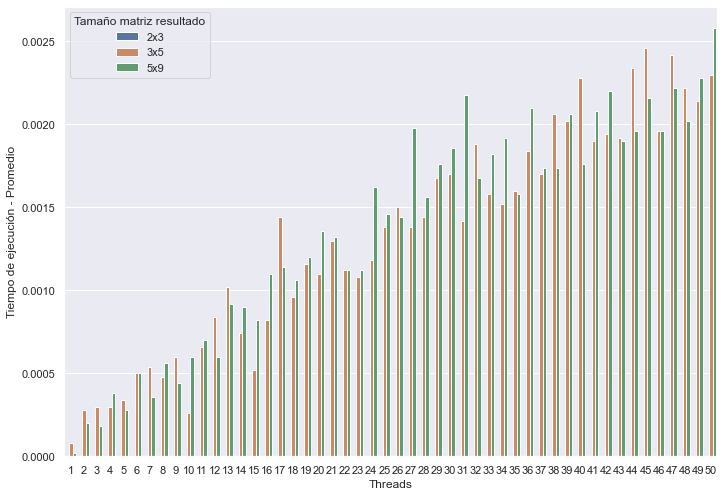

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data=df_matrix, x="Threads", y="Tiempo de ejecución - Promedio", hue="Tamaño matriz resultado")

<AxesSubplot:xlabel='Tamaño matriz resultado', ylabel='Tiempo de ejecución - Promedio'>

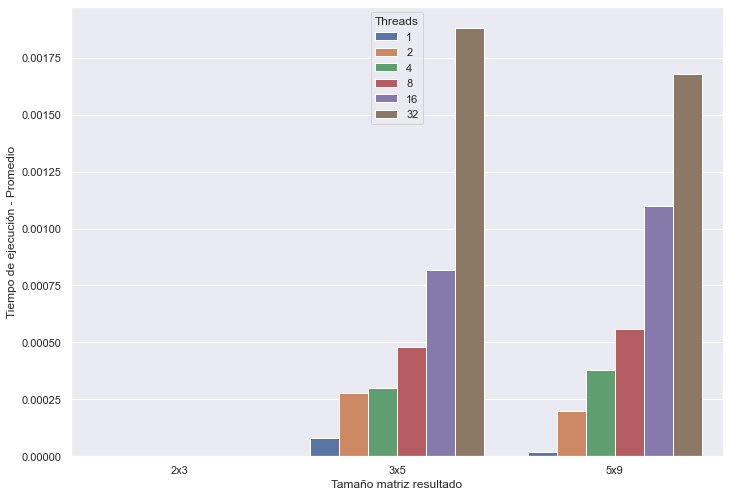

In [7]:
df_matrix_filtered = df_matrix[(df_matrix["Threads"] & df_matrix["Threads"] - 1) == 0]

sns.barplot(data=df_matrix_filtered, hue="Threads", y="Tiempo de ejecución - Promedio", x="Tamaño matriz resultado")